# Necessary functions and packages

In [115]:
from src.preprocess import preprocess
from src.HMM import HMM
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

# Data Preprocessing

## Comparing Sequences with no filtering and filtering

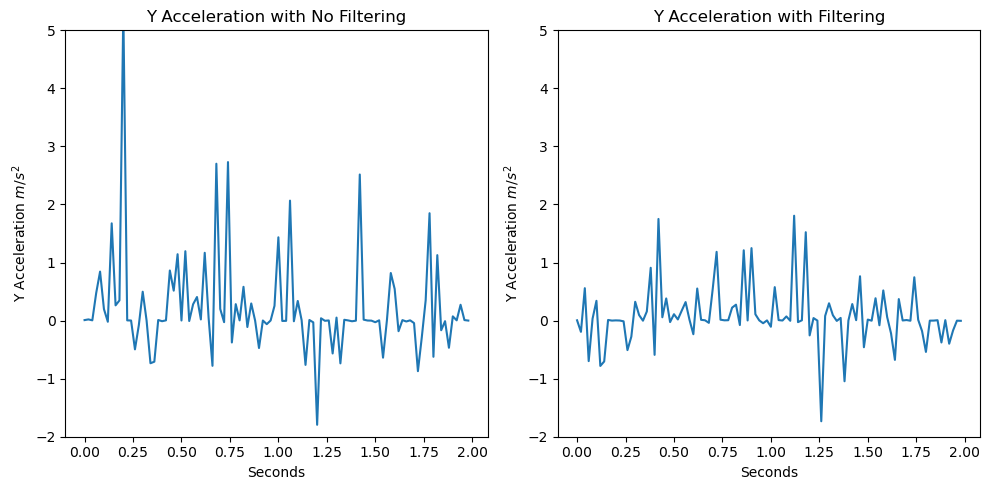

In [119]:
X_train, _, _, _ = preprocess(opt=False) 

numSamples = 100
sampRate = 50

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(np.array(range(numSamples)) / sampRate, X_train.values[0:numSamples,1])
plt.xlabel("Seconds")
plt.ylabel("Y Acceleration $m/s^2$")
plt.ylim([-2,5])
plt.title("Y Acceleration with No Filtering")

X_train, _, _, _ = preprocess(opt=True) 
plt.subplot(1,2,2)
plt.plot(np.array(range(numSamples)) / sampRate, X_train.values[0:numSamples,1])
plt.xlabel("Seconds")
plt.ylabel("Y Acceleration $m/s^2$")
plt.ylim([-2,5])
plt.title("Y Acceleration with Filtering")

plt.savefig("Figures/Filtering.png")
plt.tight_layout()
plt.show()

# Data Statistics

In [129]:
labels = ['Standing', 'Walking', 'Running']
for i in range(X_train.shape[1]):
    print("Size of class", f"{labels[i]} in training set: ", X_train[y_train == i].shape[0])

for i in range(X_test.shape[1]):
    print("Size of class", f"{labels[i]} in validation set: ", X_test[y_test == i].shape[0])

Size of class Standing in training set:  9588
Size of class Walking in training set:  8880
Size of class Running in training set:  3861
Size of class Standing in validation set:  3197
Size of class Walking in validation set:  2960
Size of class Running in validation set:  1287


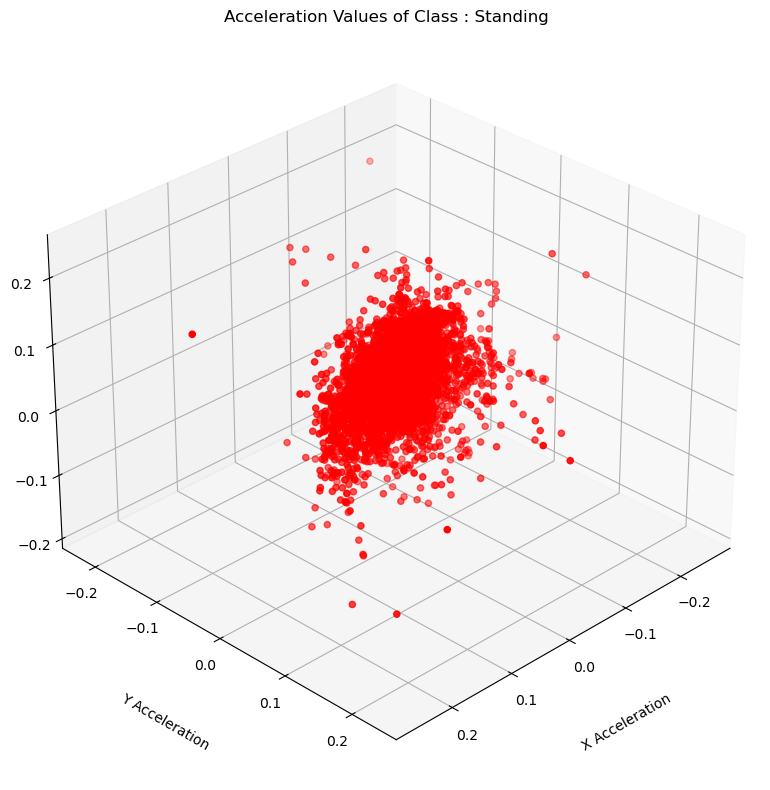

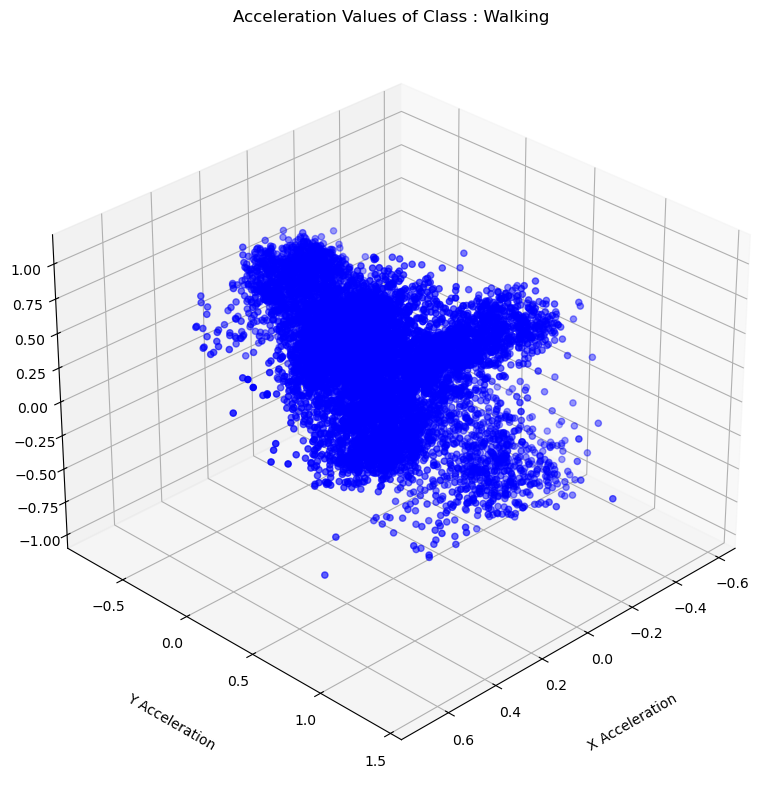

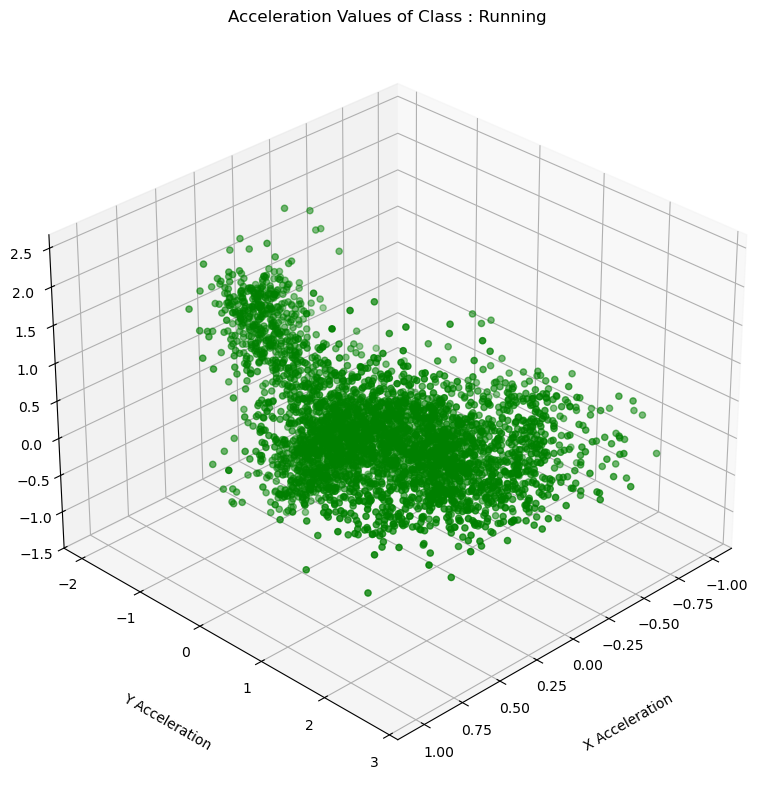

In [112]:
X_train, X_test, y_train, y_test = preprocess() 

colors = ['red', 'blue', 'green']

for i in range(len(labels)):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(
        X_train[y_train == i]['xAcc'].values, 
        X_train[y_train == i]['yAcc'].values, 
        X_train[y_train == i]['zAcc'].values,
        c = colors[i]
    )
    
    ax.set_xlabel('X Acceleration', labelpad=25)
    ax.set_ylabel('Y Acceleration', labelpad=25)
    ax.set_zlabel('Z Acceleration', labelpad=25)
    ax.set_title(f'Acceleration Values of Class : {labels[i]}')
    ax.view_init(elev=30, azim=45)
    plt.savefig(f'Figures/Scatter {labels[i]}')
    plt.tight_layout()
    plt.show()

In [3]:
model = HMM(X_train, y_train, X_test)
predLabels = model.test()

Model is not converging.  Current: 69553.61199247335 is not greater than 69553.63374138564. Delta is -0.02174891228787601


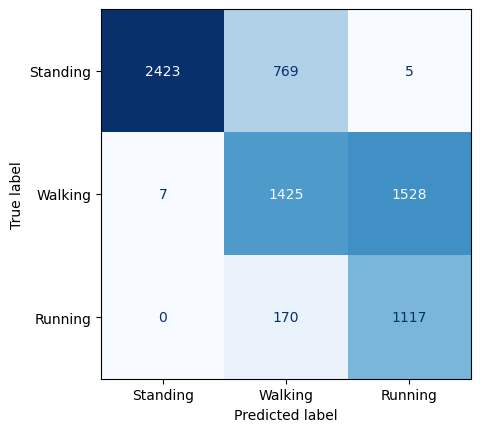

In [4]:
confusion_matrix = metrics.confusion_matrix(y_test, predLabels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = labels)
cm_display.plot(cmap = plt.cm.Blues, colorbar = False)
plt.show()

In [5]:
print("Accuracy:", accuracy_score(y_test, predLabels))
print("Classification Report:\n", classification_report(y_test, predLabels))

Accuracy: 0.6669801182160129
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.86      3197
           1       0.60      0.48      0.54      2960
           2       0.42      0.87      0.57      1287

    accuracy                           0.67      7444
   macro avg       0.67      0.70      0.65      7444
weighted avg       0.74      0.67      0.68      7444

